
# Prediction with a pre-trained model 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pi = 3.14159
resolution = 1

(200, 199)


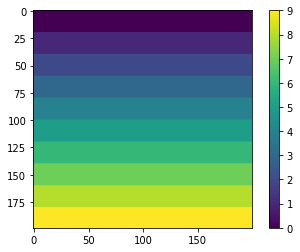

In [3]:
#think about substituting layer boundaries with a random number but so that final range is = to the y-axis.
model = np.zeros((200,199), dtype=np.int) 
model[:,20:40]=1
model[:,40:60]=2
model[:,60:80]=3
model[:,80:100]=4
model[:,100:120]=5
model[:,120:140]=6
model[:,140:160]=7
model[:,160:180]=8
model[:,180:]=9
plt.imshow(model.T, cmap='viridis', aspect=1,origin='upper')
plt.colorbar()
print (np.shape(model))

In [4]:
fx,fy = (np.arange(model.shape[0])**1.5),np.arange(model.shape[1])
result = []
for i in fx:
  for j in fy:
    prod = i + j
    cond = np.where(prod > np.median(i)*1.06, pi, prod)
    result += [cond]
listric = np.array(result).reshape(model.shape[0],model.shape[1],order='C')
listric = np.fliplr(listric)

In [5]:
fx,fy = (np.arange(model.shape[0])**1.5),np.arange(model.shape[1])
result = []
for i in fx:
  for j in fy:
    prod = i * j
    cond = np.where(prod > np.median(j)**2.4, pi, prod)
    result += [cond]
normal = np.array(result).reshape(model.shape[0],model.shape[1],order='C')

In [6]:
fx,fy = (np.arange(model.shape[0])**1.5),np.arange(model.shape[1])
result = []
for i in fx:
  for j in fy:
    prod = i * j
    cond = np.where(prod > np.median(j)**2.6, pi, prod)
    result += [cond]
reverse = np.array(result).reshape(model.shape[0],model.shape[1],order='C')

In [7]:
rmodel = np.roll(model,25,axis=1)
normalmod = np.where(normal == pi, rmodel, model)
reversemod = np.where(reverse == pi, model, rmodel)
listricmod = np.where(listric == pi, rmodel, model)

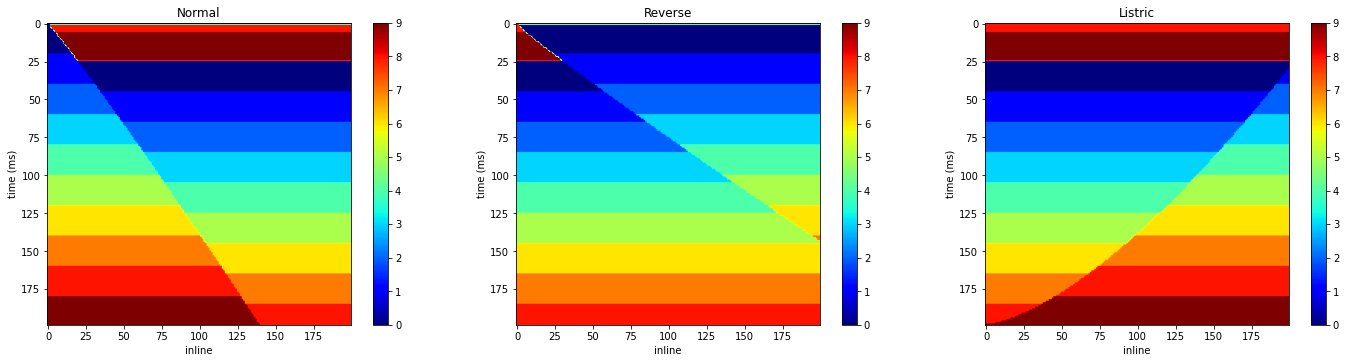

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
im1 = axs[0].imshow(normalmod.T,origin='upper',cmap='jet',aspect=1)
axs[0].set_xlabel('inline')
axs[0].set_ylabel('time (ms)')
axs[0].set_title('Normal')
plt.colorbar(im1,ax=axs[0])

im2 = axs[1].imshow(reversemod.T,origin='upper',cmap='jet',aspect=1)
axs[1].set_xlabel('inline')
axs[1].set_ylabel('time (ms)')
axs[1].set_title('Reverse')
plt.colorbar(im2,ax=axs[1])

im2 = axs[2].imshow(listricmod.T,origin='upper',cmap="jet",aspect=1)
axs[2].set_xlabel('inline')
axs[2].set_ylabel('time (ms)')
axs[2].set_title('Listric')
plt.colorbar(im2,ax=axs[2])

plt.tight_layout()

In [9]:
faulted = np.array([normalmod,reversemod,listricmod])
faulted.shape

(3, 200, 199)

In [10]:
exp = np.expand_dims(faulted,axis=3) * np.ones((1,1,2))
exp.shape

(3, 200, 199, 2)

In [11]:
rocks = np.array([[2700, 2750],  # Vp, rho
                  [2400, 2450],
                  [2600, 2650], 
                  [2400, 2450],
                  [2800, 3000], 
                  [3100, 3200],
                  [2500, 3200],
                  [2600, 3350],
                  [2700, 3350],
                  [2800, 3120]])

### Array index multiplication example a[b] the values from a are arranged into the shape of b, where the values in b are indices used to index the parts of a that will be arranged inplace in the shape of a. Final shape is like b,a. So last dimension of b should be broadcastable with first dimension of a.

### Array index multiplication example: a[b] 
The values from a are arranged into the shape of b, where the values in b are indices used to index the parts of a that will be arranged inplace in the shape of a. Final shape is like b,a. The number of values in b should be the same as the first dimension of a.

In [12]:
test = np.array([[1001,2002,3003],[4004,5005,6006]])
mest = np.array([[[0,1],[1,0],[1,1]]])
print('test',test.shape,'mest',mest.shape)

test (2, 3) mest (1, 3, 2)


In [13]:
blog = test[mest]
print(blog.shape)
blog

(1, 3, 2, 3)


array([[[[1001, 2002, 3003],
         [4004, 5005, 6006]],

        [[4004, 5005, 6006],
         [1001, 2002, 3003]],

        [[4004, 5005, 6006],
         [4004, 5005, 6006]]]])

# New Section

In [14]:
r = np.random.RandomState(1234)
rnd = r.rand(20,10,2)*0.2
print (np.shape(rnd))

(20, 10, 2)


In [15]:
mrocks = np.array([rocks + rocks*rn for rn in rnd], dtype=np.int)
manyrocks = np.rollaxis(mrocks,1,0)
manyrocks.shape

(10, 20, 2)

In [16]:
earth = manyrocks[normalmod.T]
earth.shape

(199, 200, 20, 2)

In [18]:
normset = np.rollaxis(earth,2)
print(normset.shape)

(20, 199, 200, 2)


In [19]:
normAI = np.array([np.apply_along_axis(np.product, -1, e).astype(float) for e in normset])# Python 2
np.shape(normAI)

(20, 199, 200)

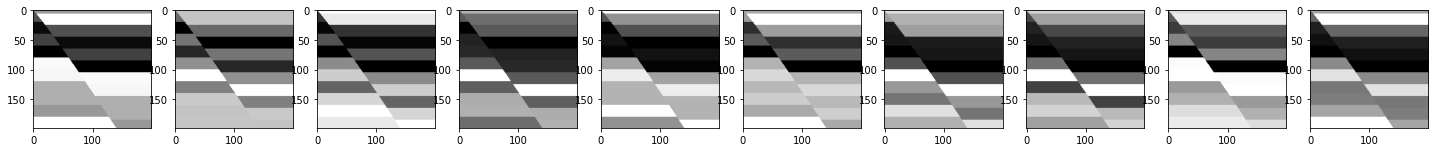

In [20]:
fig, ax = plt.subplots(nrows=1,ncols=10,figsize=(25,10))
for i in [0,1,2,3,4,5,6,7,8,9]:
  ax[i].imshow(normAI[i],cmap='gray')

# Convolve synthetic model

In [21]:
impedances = np.copy(normAI)
rc =  [(flt[1:,:] - flt[:-1,:]) / (flt[1:,:] + flt[:-1,:]) for flt in impedances]
print (np.shape(rc))

(20, 198, 200)


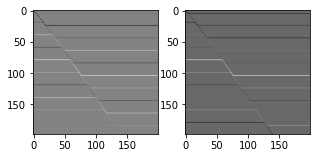

In [34]:
plt.figure(figsize=(5, 5))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax1.imshow(rc[2],cmap='gray', aspect=1)
ax2.imshow(rc[4],cmap='gray', aspect=1)

In [ ]:
!pip install bruges
list_of_f = [35/3, 40/3, 45/3, 50/3, 55/3, 60/3, 65/3, 70/3, 75/3, 80/3]
import bruges
ws = []
ws = [bruges.filters.ricker(duration=0.2, dt=0.002, f=fr) 
      for fr in list_of_f]

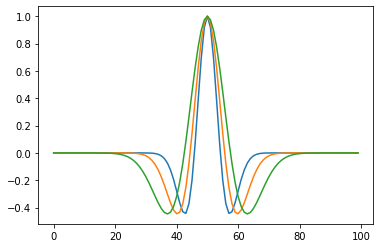

In [24]:
plt.plot(ws[9])
plt.plot(ws[5])
plt.plot(ws[2])

In [25]:
synth = np.array([np.apply_along_axis(lambda t: np.convolve(t, w, mode='same'), axis=0,
                             arr=r) for r in rc for w in ws ]) # this way sorted by rc primary

print (np.shape(synth))

(200, 198, 200)


In [26]:
import scipy as sp
blurred = sp.ndimage.gaussian_filter(synth, sigma=1.1)
noisy = blurred + 0.5 * blurred.std() * np.random.random(blurred.shape)
print (np.shape(noisy))

(200, 198, 200)


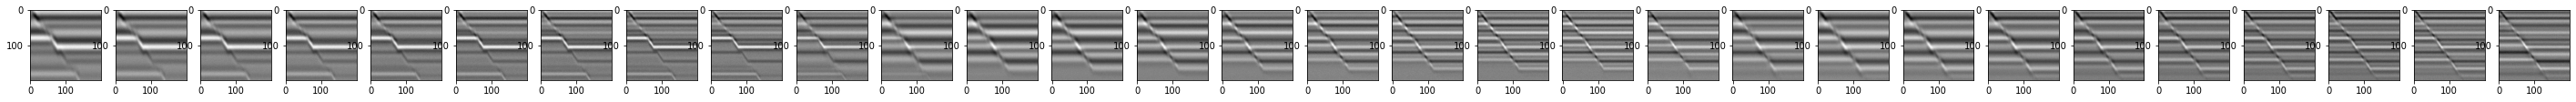

In [27]:
fig, ax = plt.subplots(nrows=1,ncols=30,figsize=(50,20))
for i in range(0,30):
  ax[i].imshow(noisy[i],cmap='gray')

# Fault mask creation

In [28]:
mask = np.zeros_like(noisy)

In [29]:
mrc =  np.array([(flt.T[1:,:] - flt.T[:-1,:]) / (flt.T[1:,:] + flt.T[:-1,:]) for flt in impedances])
mrc.shape

(20, 199, 199)

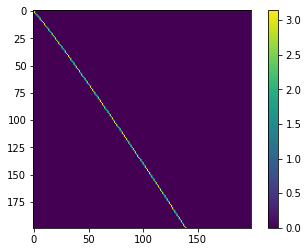

In [31]:
mask = np.where(mrc[1].T != 0, pi, 0)
plt.imshow(mask)
plt.colorbar()

In [ ]:
shii = shhiii

# New Machine learning

# Machine Learning section (old)

In [ ]:
#!pip install keras
#!pip install unet
#!pip install tensorflow
!pip install h5py
import tensorflow as tf
import numpy as np
from keras.models import load_model
from keras.models import model_from_json
from unet import *

# load json and create model 
json_file = open('model3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("pretrained_model.hdf5") # will bug if file not directly available in tree
print("Loaded model from disk")
# training image dimensions
n1, n2, n3 = 128, 128, 128

In [ ]:
# set gaussian weights in the overlap bounaries
def getMask(os): # defines a command for the operating system
    sc = np.zeros((n1,n2,n3),dtype=np.single) # sets "sc" as an array 128x128x128 float
    sc = sc+1 # sets values of "sc" array to all be '1'.
    sp = np.zeros((os),dtype=np.single) # sets sp as
    sig = os/4
    sig = 0.5/(sig*sig)
    for ks in range(os):
        ds = ks-os+1
        sp[ks] = np.exp(-ds*ds*sig)
    for k1 in range(os):
        for k2 in range(n2):
            for k3 in range(n3):
                sc[k1][k2][k3]=sp[k1]
                sc[n1-k1-1][k2][k3]=sp[k1]
    for k1 in range(n1):
        for k2 in range(os):
            for k3 in range(n3):
                sc[k1][k2][k3]=sp[k2]
                sc[k1][n3-k2-1][k3]=sp[k2]
    for k1 in range(n1):
        for k2 in range(n2):
            for k3 in range(os):
                sc[k1][k2][k3]=sp[k3]
                sc[k1][k2][n3-k3-1]=sp[k3]
    return sc

## ======================================================================


## prediction test on a training image 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

gx,m1,m2,m3 = np.fromfile("train/8.dat",dtype=np.single),128,128,128
gx = gx-np.min(gx)
gx = gx/np.max(gx)
gx = gx*255
k = 50
x = np.reshape(gx,(1,n1,n2,n3,1))
Y = loaded_model.predict(x,verbose=1)
fig = plt.figure(figsize=(20,20))
#inline slice
k1 = 50
plt.subplot(1, 6, 1)
imgplot1 = plt.imshow(np.transpose(x[0,k,:,:,0]),cmap=plt.cm.bone,interpolation='nearest',aspect=1)
plt.subplot(1, 6, 2)
imgplot2 = plt.imshow(np.transpose(Y[0,k,:,:,0]),cmap=plt.cm.bone,interpolation='nearest',aspect=1)
#xline slice
k2 = 110
plt.subplot(1, 6, 3)
imgplot1 = plt.imshow(np.transpose(x[0,:,k2,:,0]),cmap=plt.cm.bone,interpolation='nearest',aspect=1)
plt.subplot(1, 6, 4)
imgplot2 = plt.imshow(np.transpose(Y[0,:,k2,:,0]),cmap=plt.cm.bone,interpolation='nearest',aspect=1)

#time slice
k3 = 60
plt.subplot(1, 6, 5)
imgplot1 = plt.imshow(np.transpose(x[0,:,:,k3,0]),cmap=plt.cm.bone,interpolation='nearest',aspect=1)
plt.subplot(1, 6, 6)
imgplot2 = plt.imshow(np.transpose(Y[0,:,:,k3,0]),cmap=plt.cm.bone,interpolation='nearest',aspect=1)

In [ ]:
#ddata = np.fromfile("myf2h2h1h.dat", dtype=np.float)
#ddata.shape
dog = 200*200*100
dog

 
## ======================================================================

## prediction test on a field seismic image extracted from

## the Netherlands off-shore F3 block seismic data

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#a 3d array of gx[m1][m2][m3], please make sure the dimensions are correct!!!
#we strongly suggest to gain the seismic image before input it to the faultSeg!!!
gx,m1,m2,m3 = np.fromfile("prediction/gxl.dat",dtype=np.single),512,384,128
os = 12 #overlap width
c1 = np.round((m1+os)/(n1-os)+0.5)
c2 = np.round((m2+os)/(n2-os)+0.5)
c3 = np.round((m3+os)/(n3-os)+0.5)
c1 = int(c1)
c2 = int(c2)
c3 = int(c3)
p1 = (n1-os)*c1+os
p2 = (n2-os)*c2+os
p3 = (n3-os)*c3+os
gx = np.reshape(gx,(m1,m2,m3))
gp = np.zeros((p1,p2,p3),dtype=np.single)
gy = np.zeros((p1,p2,p3),dtype=np.single)
mk = np.zeros((p1,p2,p3),dtype=np.single)
gs = np.zeros((1,n1,n2,n3,1),dtype=np.single)
gp[0:m1,0:m2,0:m3]=gx
sc = getMask(os)
for k1 in range(c1):
    for k2 in range(c2):
        for k3 in range(c3):
            b1 = k1*n1-k1*os
            e1 = b1+n1
            b2 = k2*n2-k2*os
            e2 = b2+n2
            b3 = k3*n3-k3*os
            e3 = b3+n3
            gs[0,:,:,:,0]=gp[b1:e1,b2:e2,b3:e3]
            gs = gs-np.min(gs)
            gs = gs/np.max(gs)
            gs = gs*255
            Y = loaded_model.predict(gs,verbose=1)
            Y = np.array(Y)
            gy[b1:e1,b2:e2,b3:e3]= gy[b1:e1,b2:e2,b3:e3]+Y[0,:,:,:,0]*sc
            mk[b1:e1,b2:e2,b3:e3]= mk[b1:e1,b2:e2,b3:e3]+sc
gy = gy/mk
gy = gy[0:m1,0:m2,0:m3]
gy.tofile("data/prediction/f3d/"+"fp.dat",format="%4")

In [ ]:
from matplotlib.colors import Normalize
from PIL import Image
gx,m1,m2,m3 = np.fromfile("data/prediction/f3d/gxl.dat",dtype=np.single),512,384,128
gy.tofile("data/prediction/f3d/"+"fp.dat",format="%4")
gx = np.reshape(gx,(m1,m2,m3))
gy = np.reshape(gy,(m1,m2,m3))

k1,k2,k3 = 29,29,99
gx1 = np.transpose(gx[k1,:,:])
gy1 = np.transpose(gy[k1,:,:])
gx2 = np.transpose(gx[:,k2,:])
gy2 = np.transpose(gy[:,k2,:])
gx3 = np.transpose(gx[:,:,k3])
gy3 = np.transpose(gy[:,:,k3])

#xline slice
fig = plt.figure(figsize=(9,9))
p1 = plt.subplot(1, 2, 1)
p1.imshow(gx1,aspect=1.5,cmap=plt.cm.gray)
p2 = plt.subplot(1,2,2)
p2.imshow(gy1,aspect=1.5,interpolation="bilinear",vmin=0.4,vmax=1.0,cmap=plt.cm.gray)

#inline slice
fig = plt.figure(figsize=(12,12))
p1 = plt.subplot(1, 2, 1)
p1.imshow(gx2,aspect=1.5,cmap=plt.cm.gray)
p2 = plt.subplot(1,2,2)
p2.imshow(gy2,aspect=1.5,interpolation="bilinear",vmin=0.4,vmax=1.0,cmap=plt.cm.gray)

#time slice
fig = plt.figure(figsize=(12,12))
p1 = plt.subplot(1, 2, 1)
p1.imshow(gx3,cmap=plt.cm.gray)
p2 = plt.subplot(1,2,2)
p2.imshow(gy3,interpolation="bilinear",vmin=0.4,vmax=1.0,cmap=plt.cm.gray)
